In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Parameters Vector

Load, merge, normalization vector of parameters.

In [2]:
# Loading each csv file
df1 = pd.read_csv('TimeFreg_Female_1part.csv')
df2 = pd.read_csv('TimeFreq_Female_2part.csv')

Concatenating all four DataFrames into one.

In [3]:
allpatients = pd.concat([df1,df2])
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-289.653488,104.124024,14.434276,-33.619576,-13.436933,14.829756,15.144119,11.379615,-22.179020,30.988884,0.100807,0.023024,219.762311,0.204873,-0.270142,-1.150720,-0.297840,Zdrowy
1,-163.377016,98.576437,-55.135265,-8.253623,-41.790107,-7.342310,0.837488,-18.994352,-1.040815,12.528805,0.265944,0.066445,746.531394,0.599240,-0.686358,-0.455155,-0.192974,Zdrowy
2,-242.085673,137.511118,-42.489549,-15.014202,-9.988758,-4.249724,11.601325,2.872401,-9.788998,13.614122,0.157457,0.043750,248.335898,0.425534,-0.324867,-0.474273,0.550839,Zdrowy
3,-210.965889,125.565730,-19.524249,-31.481262,-4.936930,-8.431715,14.884468,11.076121,-27.797465,17.576680,0.099667,0.041797,185.845277,0.377677,-0.407918,0.239410,0.580150,Zdrowy
4,-239.394701,141.625921,11.478023,-22.000557,-33.801075,-4.268024,7.120927,12.934829,-4.059555,-6.530880,0.145742,0.033710,188.155904,0.365738,-0.409941,-0.941252,0.352707,Zdrowy


Features has diffrent rows, so they have to be normalized.

In [4]:
features = allpatients.drop(labels='Status',axis=1).columns
for i in features:
    allpatients[i] = (allpatients[i] - np.mean(allpatients[i]))/np.std(allpatients[i])
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,-1.984816,-1.164908,1.867890,-0.731624,0.838867,1.217849,0.456805,0.752008,-0.780540,2.407430,-1.275185,-1.742949,-0.769706,-1.841091,1.135021,-1.338427,-1.452019,Zdrowy
1,1.320959,-1.411365,-1.153723,1.163340,-0.967231,-0.516175,-0.631627,-1.718633,1.252226,0.736199,1.861984,0.985584,1.110713,0.563290,-1.023943,-0.576274,-1.209383,Zdrowy
2,-0.739544,0.318346,-0.604482,0.658291,1.058516,-0.274311,0.187274,0.060025,0.410953,0.834455,-0.198990,-0.440568,-0.667707,-0.495764,0.851157,-0.597222,0.511617,Zdrowy
3,0.075136,-0.212339,0.392970,-0.571881,1.380317,-0.601375,0.437051,0.727321,-1.320840,1.193194,-1.296842,-0.563300,-0.890781,-0.787539,0.420362,0.184784,0.579435,Zdrowy
4,-0.669098,0.501150,1.739491,0.136375,-0.458329,-0.275742,-0.153590,0.878510,0.961927,-0.989315,-0.421530,-1.071460,-0.882533,-0.860327,0.409866,-1.108907,0.053187,Zdrowy


Afterwards data have to be suffled, in order to avoid overfitting

In [5]:
allpatients = allpatients.sample(frac=1).reset_index(drop=True)
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Status
0,1.202209,0.358531,-1.395589,0.080370,-0.418635,0.202608,0.093851,1.093675,-1.266771,0.267448,0.650652,1.199139,1.751763,0.022739,-1.292338,0.154065,-1.887464,Chory
1,-1.008372,1.545601,0.757535,0.034126,-0.611751,0.141870,0.510072,1.246137,-0.526339,0.654291,-0.287995,-0.824815,-0.864802,-1.065920,0.201297,-0.813195,-1.030225,Chory
2,-0.069370,0.047183,-0.114167,-0.579850,1.923075,0.830561,-0.335534,0.743864,-1.055973,1.405664,0.856824,-1.895184,-1.554197,-0.096888,0.156814,-0.281956,1.299797,Chory
3,-0.289177,-0.623425,1.483099,1.027130,-0.016151,0.518502,1.253618,0.140264,0.931403,0.081334,0.208959,-0.739846,-0.780053,-0.318775,0.249372,-0.453507,0.272966,Zdrowy
4,0.074742,1.019937,-0.543223,0.872093,-1.329401,0.440868,0.984935,-0.778220,-0.324452,0.046321,0.780741,-0.635996,-0.722654,0.344184,-0.611900,-1.113839,-0.650491,Chory


# PCA

In [6]:
from sklearn.decomposition import PCA

In [7]:
pca = PCA(n_components=3)
pca.fit(allpatients.drop(['Status'], axis=1))
X = pca.transform(allpatients.drop(['Status'], axis=1))
X = pd.DataFrame(X, columns=['A','B','C'])
X['Status'] = allpatients['Status']

In [8]:
from mpl_toolkits.mplot3d import Axes3D

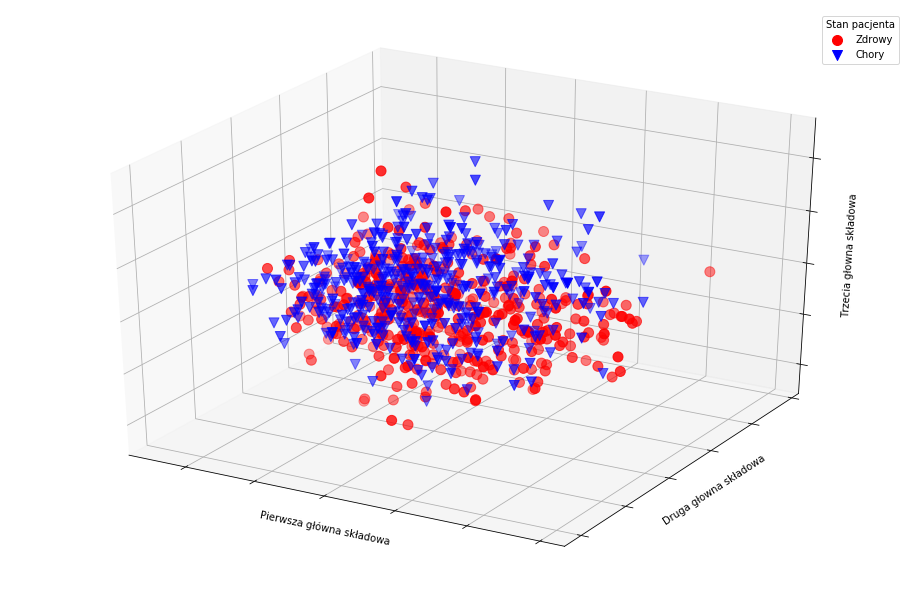

In [9]:
fig = plt.figure()
fig.set_size_inches(16, 10.5)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[X['Status']=='Zdrowy']['A'],
           X[X['Status']=='Zdrowy']['B'],
           X[X['Status']=='Zdrowy']['C'],
           s=100,
           c='r',
           marker='o',
           label='Zdrowy')
ax.scatter(X[X['Status']=='Chory']['A'],
           X[X['Status']=='Chory']['B'],
           X[X['Status']=='Chory']['C'],
           s=100,
           c='b',
           marker='v',
           label='Chory')
plt.legend(loc='upper right', frameon = True, title = 'Stan pacjenta')
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_zticklabels([])
ax.set_xlabel('Pierwsza główna składowa')
ax.set_ylabel('Druga głowna składowa')
ax.set_zlabel('Trzecia głowna składowa')
plt.show()

# Dummy variables
We'll need to convert categorical features (Status) to dummy variables, because our alghoritm can't understant what means 'healthy'.

In [10]:
status = pd.get_dummies(allpatients['Status'],drop_first=True)

In [11]:
allpatients.drop(['Status'],axis=1,inplace=True)

In [12]:
allpatients['Chory'] = status
allpatients.head()

,MFCC1,MFCC2,MFCC3,MCCC4,MFCC5,MFCC6,MFCC7,MFCC8,MFCC9,MFCC10,RMS,ZCR,F0,MAX,MIN,KURTOSIS,SKEWNESS,Chory
0,1.202209,0.358531,-1.395589,0.080370,-0.418635,0.202608,0.093851,1.093675,-1.266771,0.267448,0.650652,1.199139,1.751763,0.022739,-1.292338,0.154065,-1.887464,0
1,-1.008372,1.545601,0.757535,0.034126,-0.611751,0.141870,0.510072,1.246137,-0.526339,0.654291,-0.287995,-0.824815,-0.864802,-1.065920,0.201297,-0.813195,-1.030225,0
2,-0.069370,0.047183,-0.114167,-0.579850,1.923075,0.830561,-0.335534,0.743864,-1.055973,1.405664,0.856824,-1.895184,-1.554197,-0.096888,0.156814,-0.281956,1.299797,0
3,-0.289177,-0.623425,1.483099,1.027130,-0.016151,0.518502,1.253618,0.140264,0.931403,0.081334,0.208959,-0.739846,-0.780053,-0.318775,0.249372,-0.453507,0.272966,1
4,0.074742,1.019937,-0.543223,0.872093,-1.329401,0.440868,0.984935,-0.778220,-0.324452,0.046321,0.780741,-0.635996,-0.722654,0.344184,-0.611900,-1.113839,-0.650491,0


# Train test split

In [13]:
from sklearn.model_selection import train_test_split

In [88]:
X_train, X_test, y_train, y_test = train_test_split(allpatients.drop(['Chory'], axis=1), 
                                                    allpatients['Chory'], 
                                                    test_size=0.20, 
                                                    random_state=42)

# Logistic Regression Algorithm

In [89]:
from sklearn.linear_model import LogisticRegression

In [90]:
logModel = LogisticRegression(max_iter=1000, C = 0.01, solver='liblinear')
logModel.fit(X_train, y_train)

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [91]:
prediction = logModel.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [92]:
from sklearn.metrics import classification_report, confusion_matrix

In [93]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.76      0.76      0.76        88
           1       0.75      0.75      0.75        84

   micro avg       0.76      0.76      0.76       172
   macro avg       0.76      0.76      0.76       172
weighted avg       0.76      0.76      0.76       172



In [94]:
print(confusion_matrix(y_test,prediction))

[[67 21]
 [21 63]]


# Random Forest Algorithm

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
clf = RandomForestClassifier(n_estimators=400)

In [97]:
clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [98]:
prediction = clf.predict(X_test)

# Evaluation
Check precission, recall, f1-score using classification report

In [99]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74        88
           1       0.73      0.73      0.73        84

   micro avg       0.73      0.73      0.73       172
   macro avg       0.73      0.73      0.73       172
weighted avg       0.73      0.73      0.73       172



In [82]:
print(confusion_matrix(y_test,prediction))

[[101  32]
 [ 42  82]]


In [59]:
feature_importance = clf.feature_importances_

[Text(0,0,'MFCC1'),
 Text(0,0,'MFCC2'),
 Text(0,0,'MFCC3'),
 Text(0,0,'MCCC4'),
 Text(0,0,'MFCC5'),
 Text(0,0,'MFCC6'),
 Text(0,0,'MFCC7'),
 Text(0,0,'MFCC8'),
 Text(0,0,'MFCC9'),
 Text(0,0,'MFCC10'),
 Text(0,0,'RMS'),
 Text(0,0,'ZCR'),
 Text(0,0,'F0'),
 Text(0,0,'MAX'),
 Text(0,0,'MIN'),
 Text(0,0,'KURTOSIS'),
 Text(0,0,'SKEWNESS')]

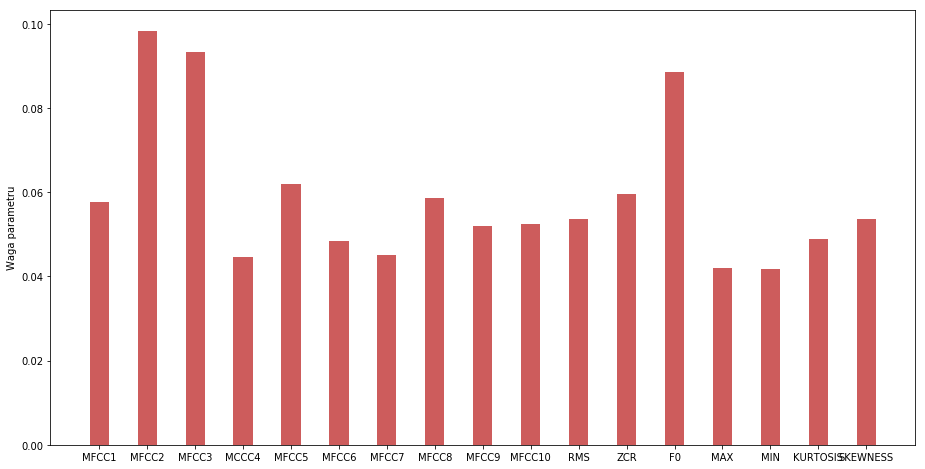

In [60]:
fig, ax = plt.subplots()
fig.set_size_inches(15.5, 8)
plt.grid(b=False)
ind = np.arange(len(feature_importance))  # the x locations for the groups
width = 0.4  # the width of the bars
ax.bar(ind, feature_importance, width, color='IndianRed')
ax.set_ylabel('Waga parametru')
ax.set_xticks(ind)
ax.set_xticklabels(allpatients.drop(['Chory'],axis=1).columns)

In [61]:
allpatients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 18 columns):
MFCC1       856 non-null float64
MFCC2       856 non-null float64
MFCC3       856 non-null float64
MCCC4       856 non-null float64
MFCC5       856 non-null float64
MFCC6       856 non-null float64
MFCC7       856 non-null float64
MFCC8       856 non-null float64
MFCC9       856 non-null float64
MFCC10      856 non-null float64
RMS         856 non-null float64
ZCR         856 non-null float64
F0          856 non-null float64
MAX         856 non-null float64
MIN         856 non-null float64
KURTOSIS    856 non-null float64
SKEWNESS    856 non-null float64
Chory       856 non-null uint8
dtypes: float64(17), uint8(1)
memory usage: 114.6 KB
